# IBM Badge - Statistics

## Victor Hugo Negrisoli

### Desenvolvedor Full-Stack Pleno | Analista de Dados

### Importando e tratando dados, média, moda, mediana, desvio padrão e agrupamento

Este notebook destina-se aos conteúdos desenvolvidos durante o curso Statistics 101 da IBM através da plataforma IBM Cognitive Class

# Sumário

1. [Importando e descrevendo os dados](#Importando-e-descrevendo-os-dados)
    1. [Configurações de gráficos da Matplotlib](#Configurações-de-gráficos-da-Matplotlib)
2. [Visualizando histogramas das variáveis](#Plotando-histogramas-de-algumas-das-variáveis)
3. [Média, moda e mediana](#Média,-moda-e-mediana)
4. [Análise exploratória e agrupamento](#Importando-e-descrevendo-os-dados)

## Importando e descrevendo os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dados = pd.read_csv('dados/teacherratings.csv')

#### Configurações de gráficos da Matplotlib

In [30]:
def configurar_plot(x, y, titulo, altura, largura):
    plt.title(titulo)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.gcf().set_size_inches(altura, largura)
    plt.show()

#### Vamos visualizar os dados que importamos

Importamos um CSV em um DataFrame do Pandas chamado "dados", logo abaixo veremos duas tabelas, uma contendo os 10 primeiros valores do dataset e os 10 últimos.

10 primeiros

In [4]:
dados.head(10)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
5,no,59,male,more,-0.737732,4.0,upper,yes,yes,35,40,2,0,0,0,0,1,1,1
6,no,59,male,more,-0.737732,2.1,upper,yes,yes,39,44,2,1,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
8,no,51,male,more,-0.571984,3.2,upper,yes,yes,111,195,3,1,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1


10 últimos

In [5]:
dados.tail(10)

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
453,yes,42,female,more,0.420400,3.3,upper,no,yes,52,67,94,0,1,1,0,1,0,1
454,yes,42,female,more,0.420400,3.2,upper,no,yes,54,66,94,0,1,1,0,1,0,1
455,yes,42,female,single,0.420400,4.1,lower,no,yes,28,35,94,1,1,1,1,0,0,1
456,yes,29,female,more,-0.848727,3.3,upper,no,yes,19,26,22,1,1,1,0,1,0,1
457,no,41,female,more,0.408168,2.3,upper,yes,yes,10,12,30,1,0,1,0,1,1,1
458,no,37,male,more,0.933396,3.5,upper,yes,yes,15,17,40,1,0,0,0,1,1,1
459,no,58,female,more,0.111563,3.5,upper,yes,yes,26,34,47,1,0,1,0,1,1,1
460,no,42,male,more,-0.900580,4.0,upper,yes,yes,45,86,61,1,0,0,0,1,1,1
461,no,39,male,more,0.643014,4.3,upper,yes,yes,22,29,62,1,0,0,0,1,1,1
462,no,51,female,more,0.391822,3.0,upper,yes,yes,47,67,69,1,0,1,0,1,1,1


Agora, iremos dividir o dataset apenas nas colunas que necessitamos

In [6]:
dados.columns

Index(['minority', 'age', 'gender', 'credits', 'beauty', 'eval', 'division',
       'native', 'tenure', 'students', 'allstudents', 'prof', 'PrimaryLast',
       'vismin', 'female', 'single_credit', 'upper_division',
       'English_speaker', 'tenured_prof'],
      dtype='object')

In [7]:
dados = dados[['minority', 'age', 'gender', 'credits', 'beauty', 'eval', 'students', 'allstudents']]

##### Descrição detalhada das variáveis

Agora iremos descrever todas as variáveis do nosso dataset

In [8]:
dados.describe()

,age,beauty,eval,students,allstudents
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000


### Plotando histogramas de algumas das variáveis

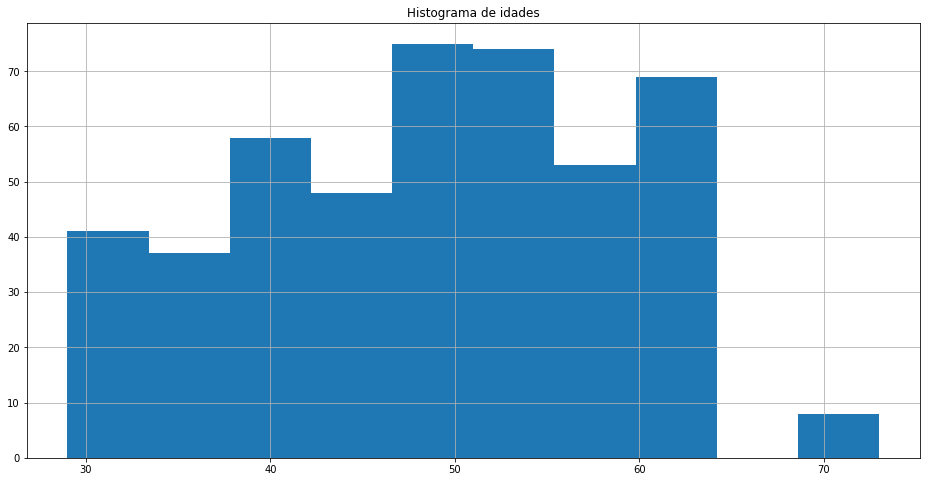

In [33]:
dados.age.hist()
configurar_plot('', '', 'Histograma de idades', 16, 8)

### Visualizando dados gerais da correlação entre as variáveis com a Seaborn

Antes de iniciarmos algumas análises estatísticas como média, moda, mediana e desvio padrão, vamos verificar como as variáveis (apenas as que selecionamos para o dataset) estão correlacionadas, e vamos separá-las pelo sexo.

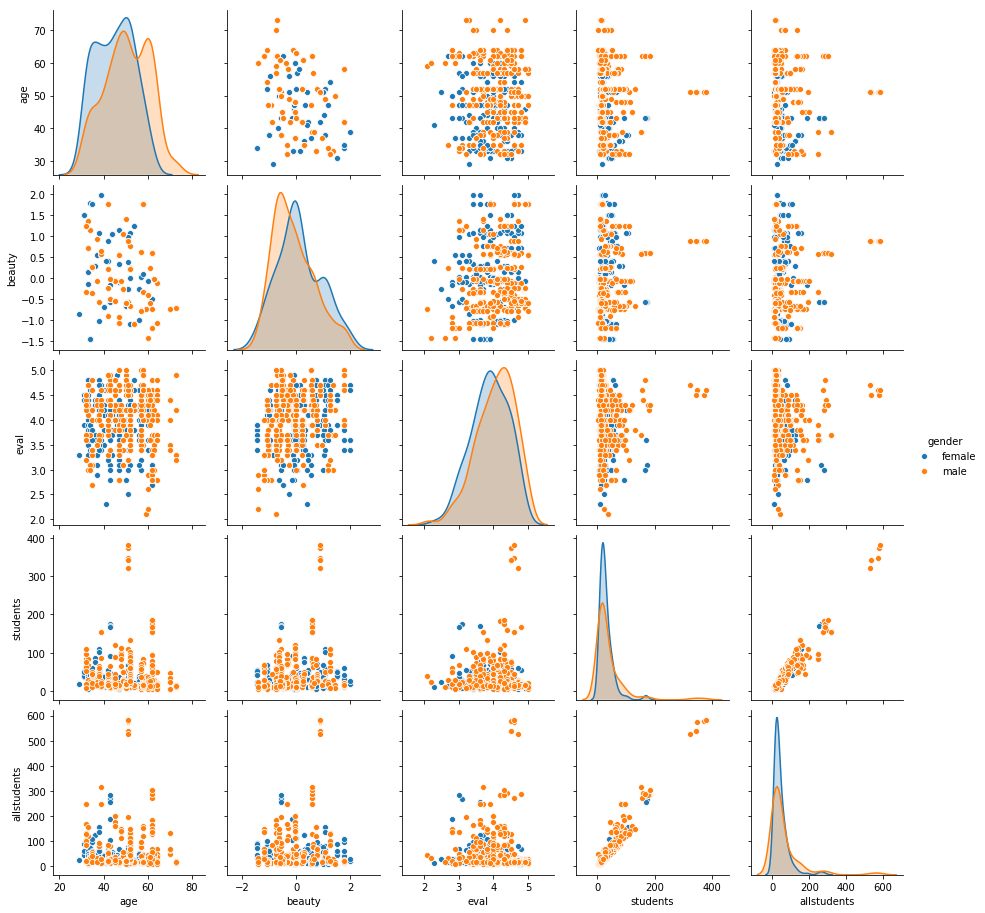

In [10]:
sns.pairplot(dados, hue = "gender", height = 2.5)
plt.show()

### Média, moda e mediana

#### Média

Iremos verificar a média de idade dos professores do sexo feminino e masculino

In [11]:
idade_sexo_media = dados[['gender', 'age']].groupby('gender').mean()
idade_sexo_media

,age
gender,
female,45.092308
male,50.746269


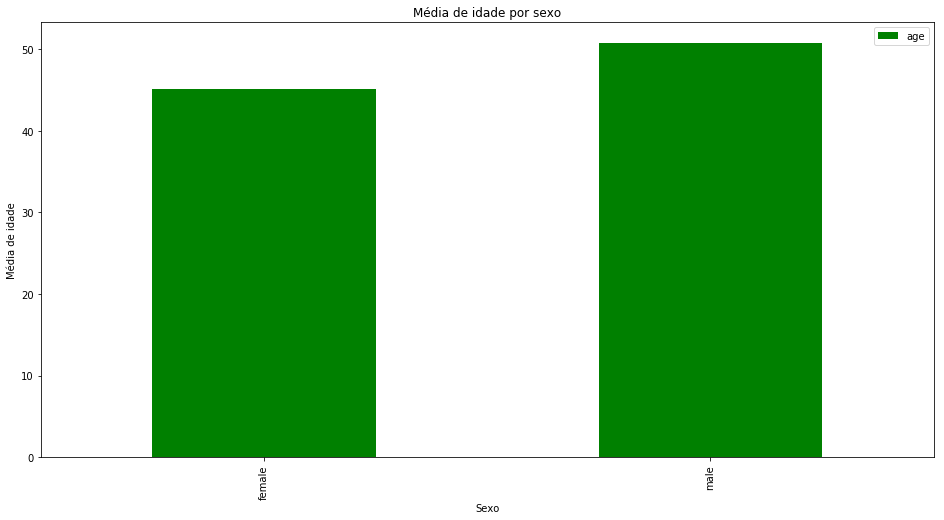

In [35]:
idade_sexo_media.plot(kind = 'bar', color = 'g')
configurar_plot('Sexo', 'Média de idade', 'Média de idade por sexo', 16, 8)

#### Mediana

Iremos verificar a mediana da idade dos professores do sexo feminino e masculino

In [13]:
idade_sexo_mediana = dados[['gender', 'age']].groupby('gender').median()
idade_sexo_mediana

,age
gender,
female,46
male,51


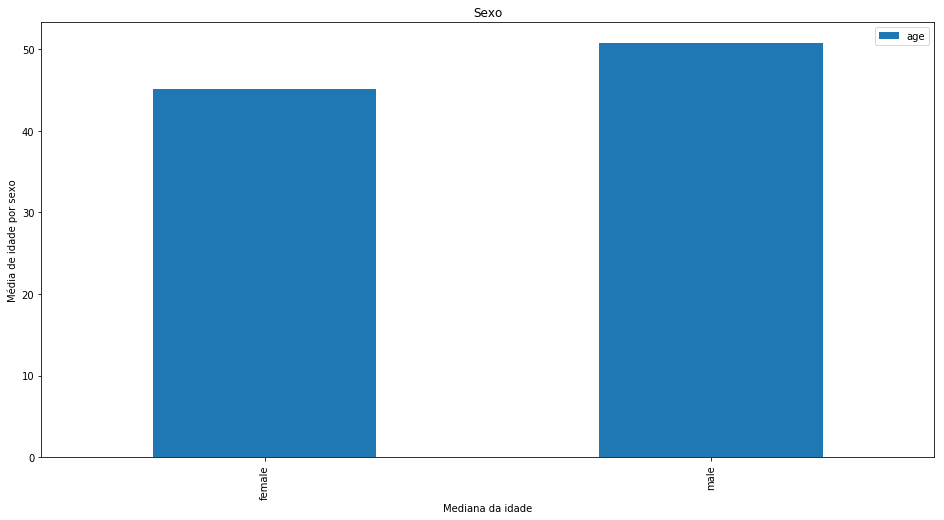

In [14]:
idade_sexo_media.plot(kind = 'bar')
configurar_plot('Sexo', 'Mediana da idade', 'Média de idade por sexo', 16, 8)

#### Moda

Iremos verificar a moda da idade dos professores do sexo feminino e masculino

In [15]:
idade_sexo_moda = dados[['gender', 'age']]

In [16]:
idade_sexo_moda.mode()

,gender,age
0,male,52


### Desvio Padrão

Primeiramente, verificaremos o desvio padrão com relação à análise anterior

In [17]:
idade_sexo_desvio_padrao = dados[['gender', 'age']].groupby('gender').std()
idade_sexo_desvio_padrao

,age
gender,
female,8.532031
male,9.993396


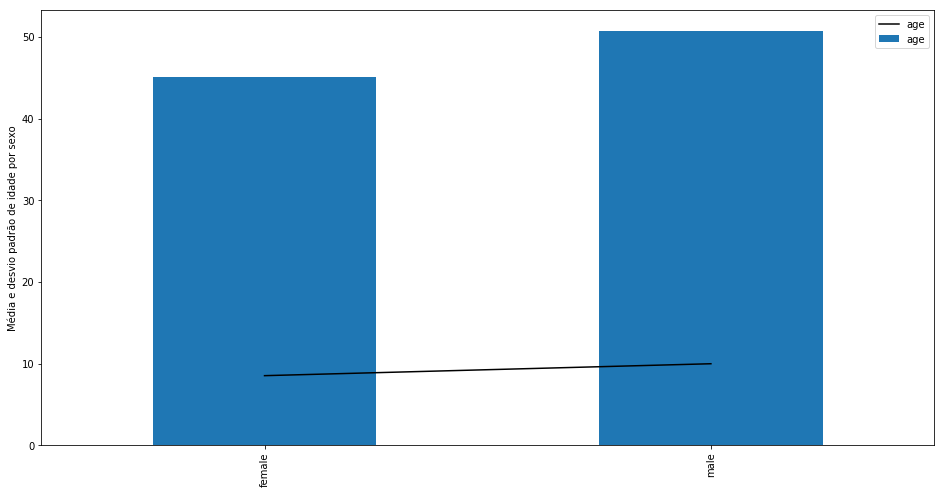

In [18]:
ax = idade_sexo_desvio_padrao.plot(color = 'black')
idade_sexo_media.plot(kind = 'bar', ax = ax)
configurar_plot('', '', 'Média e desvio padrão de idade por sexo', 16, 8)

### Analisando a média, mediana, moda e desvio padrão por avaliação e quantidade de alunos

In [19]:
avaliacao_qtd_alunos = dados[["eval", "allstudents"]]
avaliacao_qtd_alunos.head()

,eval,allstudents
0,4.3,43
1,3.7,125
2,3.6,125
3,4.4,123
4,4.5,20


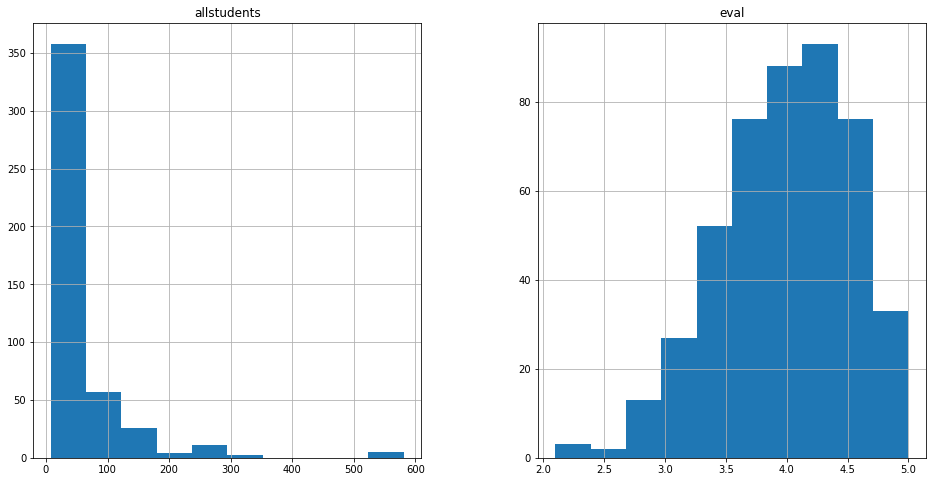

In [36]:
avaliacao_qtd_alunos.hist()
plt.gcf().set_size_inches(16, 8)

Abaixo veremos uma listaegm única de avaliações feitas 

In [21]:
avaliacao_qtd_alunos["eval"].unique()

array([4.30000019, 3.70000005, 3.5999999 , 4.4000001 , 4.5       ,
       4.        , 2.0999999 , 3.20000005, 3.5       , 4.0999999 ,
       4.5999999 , 3.79999995, 4.19999981, 3.9000001 , 4.80000019,
       3.29999995, 3.4000001 , 2.5       , 4.69999981, 5.        ,
       3.0999999 , 2.70000005, 2.9000001 , 4.9000001 , 3.        ,
       2.79999995, 2.20000005, 2.5999999 , 2.29999995])

In [22]:
agrupamento = avaliacao_qtd_alunos.groupby('eval')

Após criarmos o dataset agrupado, iremos definir as variáveis com as 4 operações desejadas: média, mediana, moda e desvio padrão

In [23]:
media = agrupamento.mean()
mediana = agrupamento.median()
moda = avaliacao_qtd_alunos.mode()
desvio_padrao = agrupamento.std()

Iremos plotar a diferença da média e da mediana

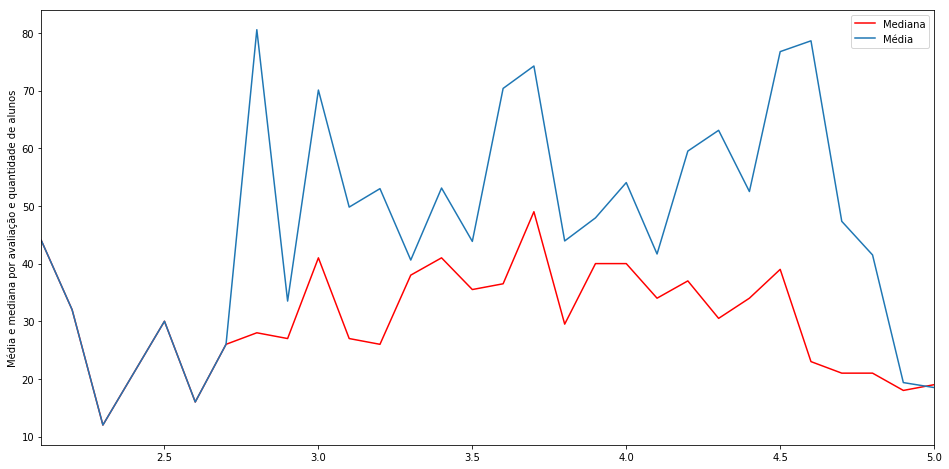

In [24]:
mediana_plot = mediana.plot(label = 'Mediana', color = 'r')
media.plot(label = 'Média', ax = mediana_plot).legend(['Mediana', 'Média'])
configurar_plot('', '', 'Média e mediana por avaliação e quantidade de alunos', 16, 8)

Iremos plotar a diferença da média e seu desvio padrão

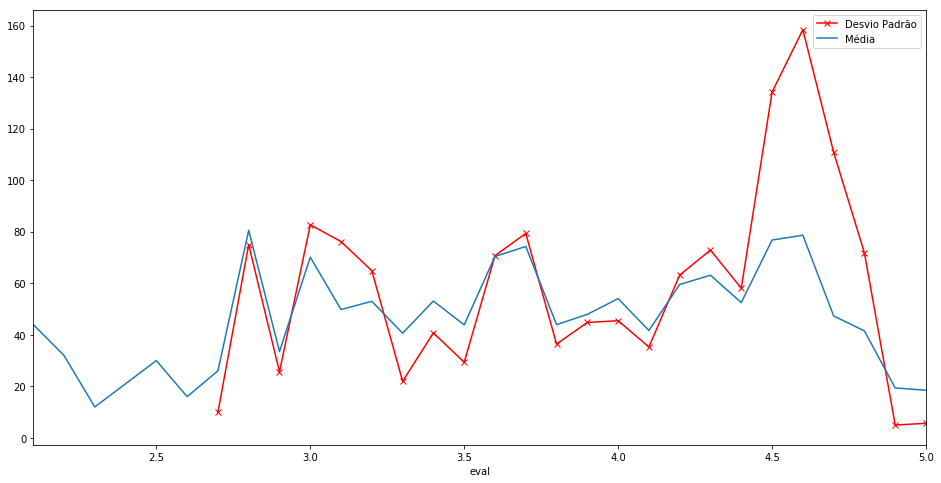

In [29]:
desvio_padrao_plot = desvio_padrao.plot(label = 'Desvio Padrão', color = 'r', marker = 'x')
media.plot(label = 'Média', ax = desvio_padrao_plot).legend(['Desvio Padrão', 'Média'])
configurar_plot('', '', 'Média e desvio padrão por avaliação e quantidade de alunos', 16, 8)

In [26]:
print('Moda da avaliação: {}'.format(moda['eval'][0]))

Moda da avaliação: 4.0


Visualizando a moda

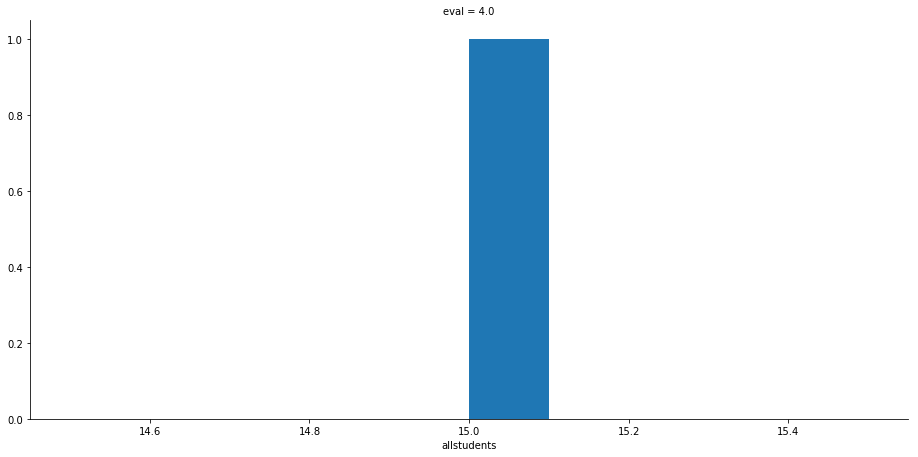

In [38]:
g = sns.FacetGrid(moda, col="eval")
g.map(plt.hist, "allstudents")

plt.gcf().set_size_inches(16, 8)

### Exportando os dados tratados

In [130]:
dados.to_csv('dados/dados_tratados.csv')